**Cereal**

I have decided to volunteer for my local shop comunity by offering to clean their recently collected census data.
Scope of this project is to review variables chapter for caterical and  numerical variables.

**01. Import data and libraries**

This dataset contain 15 columns and 77 rows, column are containing next informations:

    name:  name of the cereal product
    mfr: Manufacturer of cereal
        A = American Home Food Products;
        G = General Mills
        K = Kelloggs
        N = Nabisco
        P = Post
        Q = Quaker Oats
        R = Ralston Purina
    type:
        cold
        hot
    calories: calories per serving
    protein: grams of protein
    fat: grams of fat
    sodium: milligrams of sodium
    fiber: grams of dietary fiber
    carbo: grams of complex carbohydrates
    sugars: grams of sugars
    potass: milligrams of potassium
    vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
    shelf: display shelf (1, 2, or 3, counting from the floor)
    weight: weight in ounces of one serving
    cups: number of cups in one serving
    rating: a rating of the cereals (Possibly from Consumer Reports?) 

In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
cereals = pd.read_csv("cereal.csv")


**02. Analyse dataset**

In [8]:
# call the head() method to show first five rows
cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [12]:
# call dtypes method to check the variable type
cereals.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [20]:
# identify shape of dataframe
cereals.shape

(77, 16)

In [23]:
# remove any duplicates rows
cereals.drop_duplicates().head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [25]:
# check the unique values for each column 
cereals.nunique()

name        77
mfr          7
type         2
calories    11
protein      6
fat          5
sodium      27
fiber       13
carbo       22
sugars      17
potass      36
vitamins     3
shelf        3
weight       7
cups        12
rating      77
dtype: int64

In [29]:
# check the missing data in each column
cereals.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

**03. Category datatype with appropiate order**

In [30]:
# find out the unique values from mfr variable
cereals.mfr.unique()

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

In [39]:
# Convert the variable mfr to the Category datatype with the appropiate order 
cereals['mfr'] = pd.Categorical(cereals.mfr, ['A', 'G', 'K', 'N', 'P', 'R', 'Q' ], ordered = True)
cereals.mfr.unique()

[N, Q, K, R, G, P, A]
Categories (7, object): [A < G < K < N < P < R < Q]

**04. Label Encode the mfr variable**

In [40]:
# encode the mfr variable 
cereals['mfr_encode'] = cereals.mfr.cat.codes
cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,mfr_encode
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,3
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,6
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,2
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,2
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,5


In [41]:
# using pandas median() method print the median parameter of mfr_encode 
cereals.mfr_encode.median()

2.0

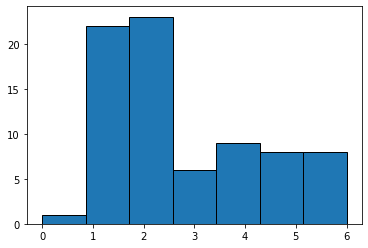

In [44]:
# create a visual distribution of the mfr_encode column
plt.hist(cereals.mfr_encode, edgecolor = 'black', bins = 7)
plt.show()

**05. Let's use One-Hot Encode to create binary variables of each category**

In [55]:
# with get_dummies() method is possible to one-hot encode type column 
new_cereals = pd.get_dummies(data = cereals.type, prefix = 'temp', columns = ['type'], drop_first = False)
new_cereals.head()

,temp_C,temp_H
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [56]:
# calculate sum for cold products 
new_cereals.temp_C.sum()

74

In [60]:
new_cereals.temp_H.sum()

3